# Lab Assignment 3
<a href='https://courses.edx.org/courses/course-v1:Microsoft+DAT210x+4T2016/courseware/1aabc1638cb64c699ddc447d16e3cfea/fcc6fcce0493405bb3b52de2f4486384/?child=first'>link</a>

You're not quite done with chronic kidney disease yet—we still need to beat it! In the previous lab assignment, you focused only on three features out of the entire dataset: **bgr**, **rc**, and **wc**. That should have seemed strange to you. How did we know to direct your attention only to those features? The answer, of course, is through PCA. By running PCA on the raw dataset data, we were able to find suitable candidate features to show the importance of feature scaling. For this lab, there will be no starter code. Copy your finished Lab 2, **assignment2.py** file over as **assignment3.py** and start working from that.

1. Head back over to the dataset page (or you can look at the kidney_disease.names file in your /Module4/Datasets/ directory). Each column has a type listed, e.g. numeric, nominal, etc. Here is a formatted list of the nominal features for your copy and pasting pleasure:<br><br><code>['id', 'classification', 'rbc', 'pc', 'pcc', 'ba', 'htn', 'dm', 'cad', 'appet', 'pe', 'ane']</code><br><br>Instead of using an indexer to select just the **bgr**, **rc**, and **wc**, alter your assignment code to **drop** all the nominal features listed above. Be sure you select the right axis for columns and not rows, otherwise Pandas will complain!
2. Right after you print out your dataset's dtypes, add an exit() so you can inspect the results. Does everything look like it should / properly numeric? If not, make code changes to coerce the remaining column(s).
3. Run your assignment and then answer the questions below.
4. Alter your code so that you only drop the **id** and **classification** columns. For the remaining 10 nominal features, properly encode them by as explained in the Feature Representation section by creating new, boolean columns using Pandas .get_dummies(). You should be able to carry that out with a single line of code. Run your assignment again and see if your results have changed at all.

### Important Notes:

Once you've completed this lab, be sure to drop by the Dive Deeper section and read the article on using PCA on boolean features! Also, it's important to keep in mind that PCA is an unsupervised learning technique. It neither knows or even cares about your data's labels and classifications. In the previous two labs, you used a pre-labeled dataset only to see how applying PCA transformations can effect other machine learning modeling process further down the analysis pipeline.

### Data Set Information

<a href='https://archive.ics.uci.edu/ml/datasets/Chronic_Kidney_Disease'>Chronic Kidney Disease data set website</a>
 
* age	-	age	
* bp	-	blood pressure 
* sg	-	specific gravity 
* al	- albumin 
* su	-	sugar 
* rbc	-	red blood cells 
* pc	-	pus cell 
* pcc	-	pus cell clumps 
* ba	-	bacteria 
* <b>bgr	-	blood glucose random</b>
* bu	-	blood urea 
* sc	-	serum creatinine 
* sod	-	sodium 
* pot	-	potassium 
* hemo	-	hemoglobin 
* pcv	-	packed cell volume 
* <b>wc	-	white blood cell count</b> 
* <b>rc	-	red blood cell count</b> 
* htn	-	hypertension 
* dm	-	diabetes mellitus 
* cad	-	coronary artery disease 
* appet	-	appetite 
* pe	-	pedal edema 
* ane	-	anemia 
* class	-	class

### Attribute Information:

We use 24 + class = 25 ( 11 numeric ,14 nominal) 
1. Age(numerical) 
age in years 
2. Blood Pressure(numerical) 
bp in mm/Hg 
3. Specific Gravity(nominal) 
sg - (1.005,1.010,1.015,1.020,1.025) 
4. Albumin(nominal) 
al - (0,1,2,3,4,5) 
5. Sugar(nominal) 
su - (0,1,2,3,4,5) 
6. Red Blood Cells(nominal) 
rbc - (normal,abnormal) 
7. Pus Cell (nominal) 
pc - (normal,abnormal) 
8. Pus Cell clumps(nominal) 
pcc - (present,notpresent) 
9. Bacteria(nominal) 
ba - (present,notpresent) 
10. <b>Blood Glucose Random(numerical)	
bgr in mgs/dl</b> 
11. Blood Urea(numerical)	
bu in mgs/dl 
12. Serum Creatinine(numerical)	
sc in mgs/dl 
13. Sodium(numerical) 
sod in mEq/L 
14. Potassium(numerical)	
pot in mEq/L 
15. Hemoglobin(numerical) 
hemo in gms 
16. Packed Cell Volume(numerical) 
17. <b>White Blood Cell Count(numerical) 
wc in cells/cumm</b> 
18. <b>Red Blood Cell Count(numerical)	
rc in millions/cmm</b> 
19. Hypertension(nominal)	
htn - (yes,no) 
20. Diabetes Mellitus(nominal)	
dm - (yes,no) 
21. Coronary Artery Disease(nominal) 
cad - (yes,no) 
22. Appetite(nominal)	
appet - (good,poor) 
23. Pedal Edema(nominal) 
pe - (yes,no)	
24. Anemia(nominal) 
ane - (yes,no) 
25. Class (nominal)	
class - (ckd,notckd)

In [66]:
# imports and config
from sklearn.decomposition import PCA
from sklearn import preprocessing

import pandas as pd

import matplotlib.pyplot as plt
import matplotlib

matplotlib.style.use('ggplot')

data_ff = r'C:\Users\ng35019\Documents\Training\python_for_ds\Module4\PCA\Datasets\kidney_disease.csv'

In [68]:
# load the data
df = pd.read_csv(data_ff); 

# Create some color coded labels; the actual label feature
# will be removed prior to executing PCA, since it's unsupervised.
# You're only labeling by color so you can see the effects of PCA


df = df.dropna(axis=0); 
labels = ['red' if i=='ckd' else 'green' for i in df.classification]; labels
df

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
9,9,53.0,90.0,1.020,2.0,0.0,abnormal,abnormal,present,notpresent,...,29,12100,3.7,yes,yes,no,poor,no,yes,ckd
11,11,63.0,70.0,1.010,3.0,0.0,abnormal,abnormal,present,notpresent,...,32,4500,3.8,yes,yes,no,poor,yes,no,ckd
14,14,68.0,80.0,1.010,3.0,2.0,normal,abnormal,present,present,...,16,11000,2.6,yes,yes,yes,poor,yes,no,ckd
20,20,61.0,80.0,1.015,2.0,0.0,abnormal,abnormal,notpresent,notpresent,...,24,9200,3.2,yes,yes,yes,poor,yes,yes,ckd
22,22,48.0,80.0,1.025,4.0,0.0,normal,abnormal,notpresent,notpresent,...,32,6900,3.4,yes,no,no,good,no,yes,ckd
27,27,69.0,70.0,1.010,3.0,4.0,normal,abnormal,notpresent,notpresent,...,37,9600,4.1,yes,yes,yes,good,yes,no,ckd
48,48,73.0,70.0,1.005,0.0,0.0,normal,normal,notpresent,notpresent,...,29,18900,3.5,yes,yes,no,good,yes,no,ckd
58,58,73.0,80.0,1.020,2.0,0.0,abnormal,abnormal,notpresent,notpresent,...,33,7200,4.3,yes,yes,yes,good,no,no,ckd
71,71,46.0,60.0,1.010,1.0,0.0,normal,normal,notpresent,notpresent,...,28,14600,3.2,yes,yes,no,good,no,no,ckd


In [ ]:
set()

In [69]:
# 1. Instead of using an indexer to select just the bgr, rc, and wc, alter your assignment code 
# to drop all the nominal features listed above. 
# Be sure you select the right axis for columns and not rows, otherwise Pandas will complain!

features2drop    = ['id', 'classification']
nominal_features = ['rbc', 'pc', 'pcc', 'ba', 'htn', 'dm', 'cad', 'appet', 'pe', 'ane']
df = df.drop(features2drop, axis=1); df

# 2.Right after you print out your dataset's dtypes, add an exit() so you can inspect the results. 
# Does everything look like it should / properly numeric? 
# If not, make code changes to coerce the remaining column(s).

df.wc = df.wc.str.replace('\t','')
wc = pd.to_numeric(df.wc, errors='coerce')
df['wc'] = wc
rc  = pd.to_numeric(df.rc, errors='coerce'); df['rc'] = rc
pcv = pd.to_numeric(df.pcv, errors='coerce'); df['pcv'] = pcv

df1 = df.drop(nominal_features, axis=1)
df2 = pd.get_dummies(df, columns=nominal_features);



df.dtypes


age      float64
bp       float64
sg       float64
al       float64
su       float64
rbc       object
pc        object
pcc       object
ba        object
bgr      float64
bu       float64
sc       float64
sod      float64
pot      float64
hemo     float64
pcv        int64
wc         int64
rc       float64
htn       object
dm        object
cad       object
appet     object
pe        object
ane       object
dtype: object

,age,bp,sg,al,su,bgr,bu,sc,sod,pot,...,dm_no,dm_yes,cad_no,cad_yes,appet_good,appet_poor,pe_no,pe_yes,ane_no,ane_yes
3,48.0,70.0,1.005,4.0,0.0,117.0,56.0,3.8,111.0,2.5,...,1,0,1,0,0,1,0,1,0,1
9,53.0,90.0,1.020,2.0,0.0,70.0,107.0,7.2,114.0,3.7,...,0,1,1,0,0,1,1,0,0,1
11,63.0,70.0,1.010,3.0,0.0,380.0,60.0,2.7,131.0,4.2,...,0,1,1,0,0,1,0,1,1,0
14,68.0,80.0,1.010,3.0,2.0,157.0,90.0,4.1,130.0,6.4,...,0,1,0,1,0,1,0,1,1,0
20,61.0,80.0,1.015,2.0,0.0,173.0,148.0,3.9,135.0,5.2,...,0,1,0,1,0,1,0,1,0,1
22,48.0,80.0,1.025,4.0,0.0,95.0,163.0,7.7,136.0,3.8,...,1,0,1,0,1,0,1,0,0,1
27,69.0,70.0,1.010,3.0,4.0,264.0,87.0,2.7,130.0,4.0,...,0,1,0,1,1,0,0,1,1,0
48,73.0,70.0,1.005,0.0,0.0,70.0,32.0,0.9,125.0,4.0,...,0,1,1,0,1,0,0,1,1,0
58,73.0,80.0,1.020,2.0,0.0,253.0,142.0,4.6,138.0,5.8,...,0,1,0,1,1,0,1,0,1,0
71,46.0,60.0,1.010,1.0,0.0,163.0,92.0,3.3,141.0,4.0,...,0,1,1,0,1,0,1,0,1,0


In [63]:
# 5. Print the variance of your dataset, as well as a .describe() printout.
print('Pairwise correlations:')
print(df1.corr())
print('\nVariance:')
print(df1.var())
print('\nDescribe:')
print(df1.describe())

Pairwise correlations:
                     age        bp        sg        al        su       bgr  \
age             1.000000  0.079712 -0.277303  0.253380  0.207711  0.301915   
bp              0.079712  1.000000 -0.198897  0.322507  0.243828  0.190113   
sg             -0.277303 -0.198897  1.000000 -0.712331 -0.448477 -0.544781   
al              0.253380  0.322507 -0.712331  1.000000  0.521448  0.518123   
su              0.207711  0.243828 -0.448477  0.521448  1.000000  0.730050   
bgr             0.301915  0.190113 -0.544781  0.518123  0.730050  1.000000   
bu              0.190636  0.316287 -0.545319  0.661940  0.312259  0.326496   
sc              0.189721  0.386551 -0.563122  0.702889  0.347196  0.331284   
sod            -0.102933 -0.224710  0.539285 -0.599334 -0.242491 -0.284968   
pot             0.006866  0.127801 -0.075057  0.209492  0.271954  0.102226   
hemo           -0.245645 -0.282365  0.682086 -0.784745 -0.385511 -0.434158   
pcv            -0.235116 -0.353504  0.678

In [64]:
# 6. Reduce your dataset to two principal components by run it through PCA, 
# then check out the resulting visualization.

def drawVectors(transformed_features, components_, columns, plt, scaled):
  import math

  if not scaled:
    return plt.axes() # No cheating ;-)

  num_columns = len(columns)

  # This funtion will project your *original* feature (columns)
  # onto your principal component feature-space, so that you can
  # visualize how "important" each one was in the
  # multi-dimensional scaling
  
  # Scale the principal components by the max value in
  # the transformed set belonging to that component
  xvector = components_[0] * max(transformed_features[:,0])
  yvector = components_[1] * max(transformed_features[:,1])

  ## visualize projections

  # Sort each column by it's length. These are your *original*
  # columns, not the principal components.
  important_features = { columns[i] : math.sqrt(xvector[i]**2 + yvector[i]**2) for i in range(num_columns) }
  important_features = sorted(zip(important_features.values(), important_features.keys()), reverse=True)
  print("Features by importance:\n{}".format(important_features))

  ax = plt.axes()

  for i in range(num_columns):
    # Use an arrow to project each original feature as a
    # labeled vector on your principal component axes
    plt.arrow(0, 0, xvector[i], yvector[i], color='b', width=0.0005, head_width=0.02, alpha=0.75)
    plt.text(xvector[i]*1.2, yvector[i]*1.2, list(columns)[i], color='b', alpha=0.75)

  return ax

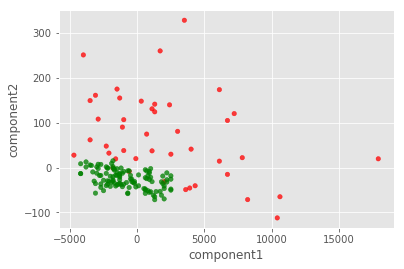

In [65]:
pca = PCA(n_components=2)
pca.fit(df)
T = pca.transform(df)

ax = drawVectors(T, pca.components_, df.columns.values, plt, False)
T = pd.DataFrame(T)
T.columns = ['component1', 'component2']
T.plot.scatter(x='component1', y='component2', marker='o', c=labels, alpha=0.75, ax=ax)
plt.show()

In [49]:
# same with scaling

scaled = preprocessing.StandardScaler().fit_transform(df)
scaled = pd.DataFrame(scaled, columns=df.columns)  
print("New Variances:\n{}".format(scaled.var()))
print("\nNew Describe:\n{}".format(scaled.describe()))

New Variances:
age               1.006369
bp                1.006369
sg                1.006369
al                1.006369
su                1.006369
bgr               1.006369
bu                1.006369
sc                1.006369
sod               1.006369
pot               1.006369
hemo              1.006369
pcv               1.006369
wc                1.006369
rc                1.006369
rbc_abnormal      1.006369
rbc_normal        1.006369
pc_abnormal       1.006369
pc_normal         1.006369
pcc_notpresent    1.006369
pcc_present       1.006369
ba_notpresent     1.006369
ba_present        1.006369
htn_no            1.006369
htn_yes           1.006369
dm_no             1.006369
dm_yes            1.006369
cad_no            1.006369
cad_yes           1.006369
appet_good        1.006369
appet_poor        1.006369
pe_no             1.006369
pe_yes            1.006369
ane_no            1.006369
ane_yes           1.006369
dtype: float64

New Describe:
                age            bp    

Features by importance:
[(2.9696150394993324, 'ane_no'), (2.969615039499332, 'ane_yes'), (2.758875925894978, 'bgr'), (2.715504955394058, 'dm_yes'), (2.715504955394058, 'dm_no'), (2.658932094139237, 'pcv'), (2.6455721001098715, 'hemo'), (2.6021126628485067, 'al'), (2.5934172193046905, 'htn_no'), (2.5934172193046896, 'htn_yes'), (2.5767305659998625, 'su'), (2.4859440233443393, 'cad_no'), (2.4859440233443384, 'cad_yes'), (2.484132428132542, 'sc'), (2.479471113704938, 'pc_normal'), (2.4794711137049377, 'pc_abnormal'), (2.4651094161860527, 'appet_poor'), (2.4651094161860527, 'appet_good'), (2.4575665060850906, 'bu'), (2.393726969612572, 'sg'), (2.3881975796285317, 'rc'), (2.210578246131015, 'pe_yes'), (2.210578246131015, 'pe_no'), (2.1828180626076494, 'sod'), (2.0059261508175275, 'rbc_normal'), (2.0059261508175275, 'rbc_abnormal'), (1.9861731688066906, 'ba_present'), (1.9861731688066906, 'ba_notpresent'), (1.9842911319071963, 'pcc_present'), (1.9842911319071959, 'pcc_notpresent'), (1.284679

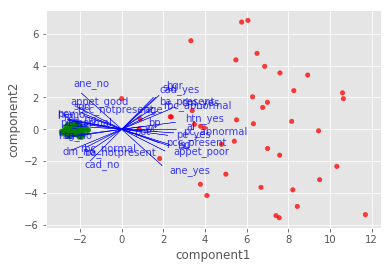

In [58]:
pca = PCA(n_components=2)
pca.fit(scaled)
T = pca.transform(scaled)

ax = drawVectors(T, pca.components_, scaled.columns.values, plt, True)
T = pd.DataFrame(T)
T.columns = ['component1', 'component2']
T.plot.scatter(x='component1', y='component2', marker='o', c=labels, alpha=0.75, ax=ax)
plt.show()

158